In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import pickle
from pymongo import MongoClient

In [94]:
df = pd.read_json("data/data.json")

In [95]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 46 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [100]:
X=df1[['name_length','num_payouts','user_age','org_facebook','org_twitter','body_length','tickets_sold','Target']]

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 8 columns):
name_length     14337 non-null int64
num_payouts     14337 non-null int64
user_age        14337 non-null int64
org_facebook    14278 non-null float64
org_twitter     14278 non-null float64
body_length     14337 non-null int64
tickets_sold    14337 non-null int64
Target          14337 non-null int64
dtypes: float64(2), int64(6)
memory usage: 1008.1 KB


In [142]:
X['org_facebook'] = X['org_facebook'].fillna(-1)
X['org_twitter'] = X['org_twitter'].fillna(-1)
#X['sale_duration'] = X['sale_duration'].fillna(-1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
sum(X['sale_duration2'].isna())

0

In [146]:
sum(X['org_twitter'].isnull())

0

In [147]:
y=subset['Target']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [149]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 9490 to 7270
Data columns (total 9 columns):
name_length       10752 non-null int64
num_payouts       10752 non-null int64
user_age          10752 non-null int64
org_facebook      10752 non-null float64
org_twitter       10752 non-null float64
body_length       10752 non-null int64
gts               10752 non-null float64
sale_duration2    10752 non-null int64
tickets_sold      10752 non-null int64
dtypes: float64(3), int64(6)
memory usage: 840.0 KB


In [150]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(array([9785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         967.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

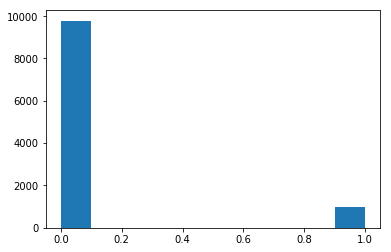

In [151]:
plt.hist(y_train)

In [152]:
pred_proba = model.predict_proba(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


(array([8.309e+03, 7.460e+02, 4.310e+02, 3.360e+02, 3.300e+02, 3.550e+02,
        2.130e+02, 2.100e+01, 4.000e+00, 7.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

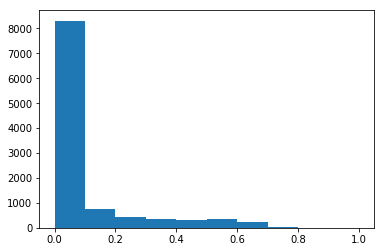

In [153]:
plt.hist(pred_proba[:,1])

In [154]:
y_pred = model.predict(X_test)

In [155]:
pred_proba = model.predict_proba(X_test)

In [156]:
cross_val_score(model,X_train,y_train,scoring ='roc_auc', cv =10)

array([0.95107568, 0.93437444, 0.95396102, 0.92960416, 0.94470478,
       0.92847806, 0.93941981, 0.9488646 , 0.93017212, 0.96147537])

In [157]:
roc_auc_score(y_test, y_pred)

0.758741719485634

In [158]:
accuracy_score(y_test,y_pred)

0.9528591352859135

In [159]:
target = pred_proba[:,1] >.15
target = target*1

In [160]:
confusion_matrix(y_test,target)

array([[2857,  402],
       [  43,  283]])

In [161]:
roc_auc_score(y_test, target)

0.8723737192145583

In [162]:
confusion_matrix(y_test,y_pred)

array([[3246,   13],
       [ 156,  170]])

In [163]:
model.coef_

array([[-7.92214072e-03, -1.22968389e-01, -1.21195573e-03,
        -6.12606104e-02, -1.45466096e-01, -8.26767041e-05,
         6.46384825e-05, -1.97923725e-02, -7.13722464e-02]])

In [164]:
gbm = GradientBoostingClassifier()
cross_val_score(gbm,X_train,y_train,cv = 5, scoring='roc_auc')

array([0.99213503, 0.98041263, 0.99140061, 0.99062618, 0.98492723])

In [165]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [166]:
gbm_pred = gbm.predict(X_test)

In [167]:
roc_auc_score(y_test,gbm_pred)

0.9294469115257983

In [168]:
rf = RandomForestClassifier()
cross_val_score(rf,X_train,y_train,cv = 5, scoring='roc_auc')

array([0.9834509 , 0.9667161 , 0.97422697, 0.98223462, 0.97254574])

In [169]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
rf_pred = rf.predict(X_test)

In [171]:
roc_auc_score(y_test,rf_pred)

0.9228521489334867

In [ ]:
param_grid={'n_estimators': [300,400,500],
            'max_depth': [3, None,1,2,5],
            'max_features': ['sqrt','log2', None]
           }

grid = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,scoring="roc_auc",cv=5)
grid.fit(X_train,y_train)

best_estimator = grid.best_params_

In [274]:
best_estimator

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 400}

In [275]:
rdf_adjusted = RandomForestClassifier(**best_estimator)
rdf_adjusted.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [173]:
mod = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
mod.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [289]:
with open('model.pkl', 'wb') as f:
        # Write the model to a file.
        pickle.dump(rdf_adjusted, f)

In [ ]:
adj_rf_pred = rdf_adjusted.predict(X_test)

In [175]:
y_mod = mod.predict(X_test)

In [176]:
roc_auc_score(y_test,y_mod)

0.938342993541246

In [177]:
f1_score(y_test,y_mod)

0.9184

In [178]:
accuracy_score(y_test,y_mod)

0.9857740585774059

In [292]:
rf_pred_proba= rdf_adjusted.predict_proba(X_test)

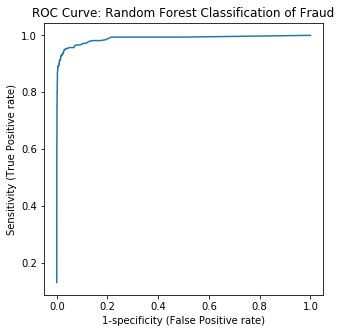

In [297]:
fpr, tpr, threshold = roc_curve(y_test,rf_pred_proba[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.xlabel("1-specificity (False Positive rate)")
plt.ylabel("Sensitivity (True Positive rate)")
plt.title("ROC Curve: Random Forest Classification of Fraud")

plt.savefig('ROC.png')

In [300]:
df = pd.read_json("data/data.json")

In [303]:
X,y= transform_train(df)

In [308]:
test_ex = X.sample(5)

In [7]:
with open('../website/model.pkl', 'rb') as f:
    model = pickle.load(f)
    

In [311]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
client = MongoClient('13.56.168.145')
#mongo -u twotickets -p nowhere 13.56.168.145/fraud
db = client['fraud']
coll=db['predicted2']

In [278]:
coll.find().count()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


114

In [ ]:
raw_data['ticket_types'][0]['event_id']

In [276]:
list(coll.find().limit(5))

[{'_id': ObjectId('5c8c02acaa241859332e9979'),
  'approx_payout_date': 1369796400,
  'body_length': 17267,
  'channels': 5,
  'country': 'CA',
  'currency': 'CAD',
  'delivery_method': 1.0,
  'description': '<p style="text-align: center; background-position: initial initial; background-repeat: initial initial;" align="center"><span style="color: #08a9cc;"><strong><span style="font-size: 16pt; font-family: Arial;">Becoming a Strategic Communications Rock Star&nbsp;<br /> </span></strong></span></p>\r\n<p style="text-align: center; background-position: initial initial; background-repeat: initial initial;" align="center"><span style="color: #08a9cc;"><strong><span style="font-size: 14pt; font-family: Arial;">An evening with IABC All-Star Speaker Caroline Kealey</span></strong></span></p>\r\n<p style="text-align: center; background-position: initial initial; background-repeat: initial initial;" align="center"><strong><span style="font-size: 14.0pt; font-family: Arial; color: blue;"><img st